## "US Housing Trends Analyzer and Influence Explorer"


#### **Build a data science models that explains how these factors impacted home prices over the last 20 years.**

#### Importing necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Reading prepared (US home prices) data into a dataframe.


In [3]:
us_house_price_df = pd.read_csv(r"D:\_SANKET_DATA_SCIENCE_\Interview\Home.LLC\final_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban pops,Num_Households,median_income,Subsidy,old pops
DATE,,,,,,,,,,,,,,,,
2002-01-01,117.143,2002,1,50091.000000,182669900,4.2,177.7,5.7,72.03249,142.0,1.73,79.409,109297.0,65820.0,24.183,12.287458
2002-02-01,117.844,2002,2,50156.000000,182822700,4.0,178.0,5.7,72.33837,142.2,1.74,79.409,109297.0,65820.0,24.183,12.287458
2002-03-01,118.687,2002,3,50221.000000,183078000,4.1,178.5,5.7,72.15660,143.2,1.73,79.409,109297.0,65820.0,24.183,12.287458
2002-04-01,119.611,2002,4,50286.000000,183316800,4.3,179.3,5.9,71.90249,143.5,1.75,79.409,109297.0,65820.0,24.183,12.287458
2002-05-01,120.724,2002,5,50311.333333,183463400,4.0,179.5,5.8,72.01910,143.8,1.75,79.409,109297.0,65820.0,24.183,12.287458


In [4]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

### Exploratory Data Analysis (EDA)


### Summary Statistics:

Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [5]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban pops,Num_Households,median_income,Subsidy,old pops
count,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,177.867373,57049.464286,1.993724e+08,6.040873,227.634663,5.999603,69.613959,209.573222,1.319008,81.173000,120770.761905,68776.666667,34.177714,13.946809
std,42.126891,4166.974559,6.961707e+06,1.958401,28.869229,1.988142,2.070985,45.902963,1.542732,1.103122,6496.223206,4512.996725,6.274362,1.540510
min,117.143000,50091.000000,1.826699e+08,3.300000,177.700000,3.500000,60.171120,142.000000,0.050000,79.409000,109297.000000,63350.000000,24.183000,12.277934
25%,146.765250,54205.833333,1.952295e+08,4.575000,205.750000,4.600000,67.800403,183.225000,0.120000,80.269000,116011.000000,65760.000000,29.512000,12.507804
50%,170.172000,55677.000000,2.015152e+08,5.500000,228.997000,5.550000,70.286190,206.300000,0.715000,81.119000,121084.000000,66780.000000,33.283000,13.584437
75%,194.002750,60008.250000,2.054688e+08,7.000000,246.482750,7.200000,71.370888,223.300000,1.935000,82.058000,126224.000000,72090.000000,37.550000,15.066290
max,304.468000,65997.000000,2.075878e+08,12.200000,298.812000,14.800000,72.338370,353.015000,5.260000,83.084000,131202.000000,78250.000000,48.021000,17.128121


### Correlation Analysis:

Calculate the correlation matrix to measure the linear relationships between variables.

In [6]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban pops,Num_Households,median_income,Subsidy,old pops
CSUSHPISA,1.000000,0.904410,0.619784,0.179697,0.822255,-0.476949,0.199286,0.898922,0.113808,0.787225,0.749023,0.831605,0.845091,0.843768
Per_Capita_GDP,0.904410,1.000000,0.852597,0.079706,0.947456,-0.430620,0.007560,0.918061,-0.104441,0.949497,0.937857,0.847236,0.931393,0.953277
working_age_pop,0.619784,0.852597,1.000000,0.170115,0.925822,-0.083542,-0.399956,0.791865,-0.359338,0.938349,0.961861,0.584218,0.872190,0.844807
Houses,0.179697,0.079706,0.170115,1.000000,0.164882,0.064714,0.012056,0.227187,0.209078,0.061684,0.063103,-0.025944,0.128325,-0.016525
CPI,0.822255,0.947456,0.925822,0.164882,1.000000,-0.198619,-0.236122,0.949516,-0.303237,0.981753,0.974578,0.714295,0.971231,0.958259
UNRATE,-0.476949,-0.430620,-0.083542,0.064714,-0.198619,1.000000,-0.848489,-0.249177,-0.513598,-0.199801,-0.210880,-0.490028,-0.138587,-0.273973
EmpRate,0.199286,0.007560,-0.399956,0.012056,-0.236122,-0.848489,1.000000,-0.109872,0.708915,-0.254200,-0.266364,0.228969,-0.247625,-0.138752
Cons_Material,0.898922,0.918061,0.791865,0.227187,0.949516,-0.249177,-0.109872,1.000000,-0.225555,0.899406,0.874035,0.684269,0.936650,0.910729
FEDFUNDS,0.113808,-0.104441,-0.359338,0.209078,-0.303237,-0.513598,0.708915,-0.225555,1.000000,-0.342245,-0.339510,0.081261,-0.315860,-0.304336
urban pops,0.787225,0.949497,0.938349,0.061684,0.981753,-0.199801,-0.254200,0.899406,-0.342245,1.000000,0.993780,0.768233,0.969430,0.976585


Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

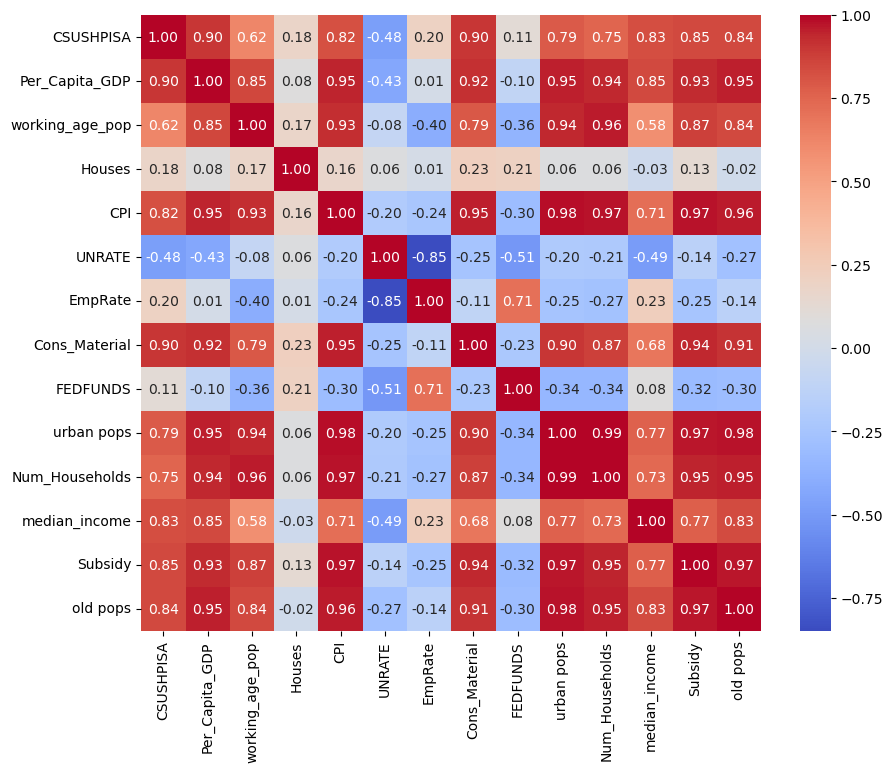

In [7]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Time Series Analysis:

For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

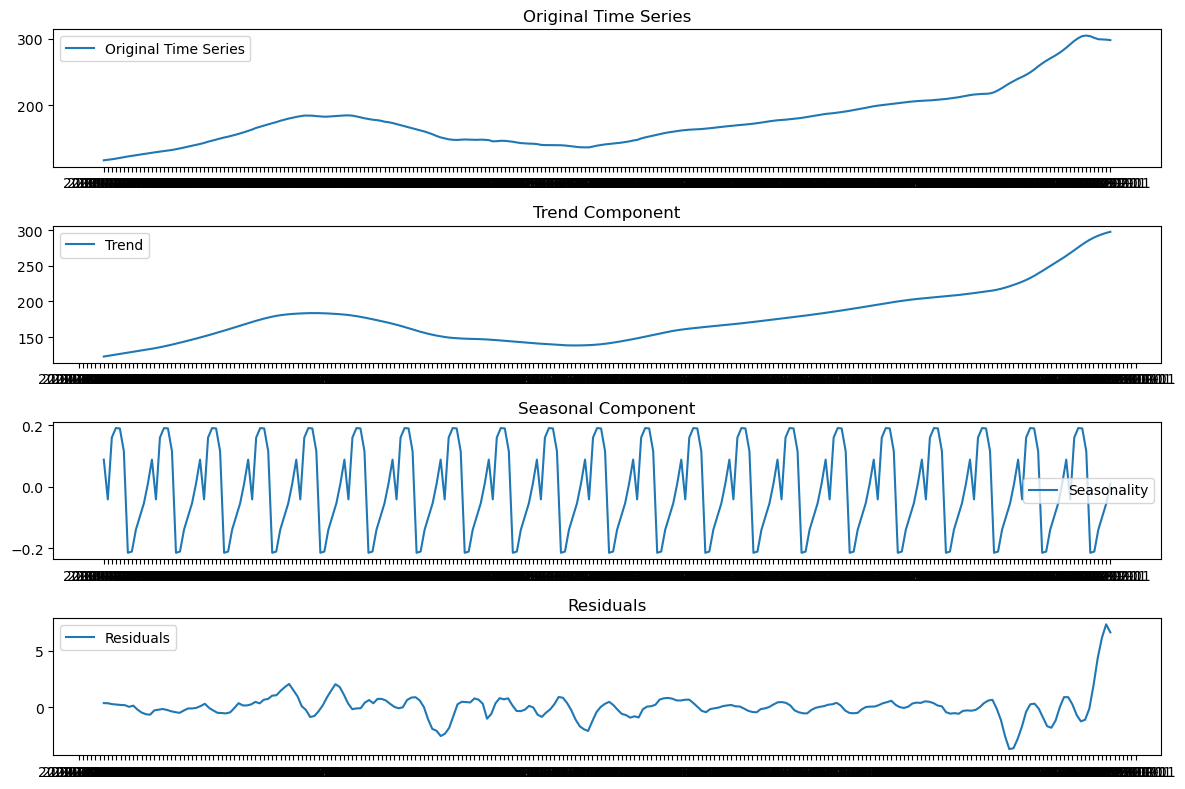

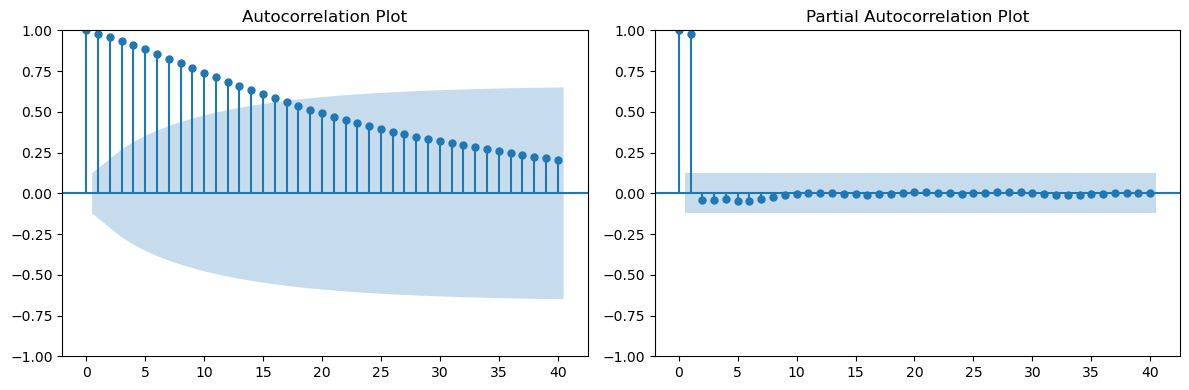

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()


The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

### Data Visualization:

Visualize the data using various plots and graphs to understand its distribution and trends.

**Pairplot for visualizing relationships**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


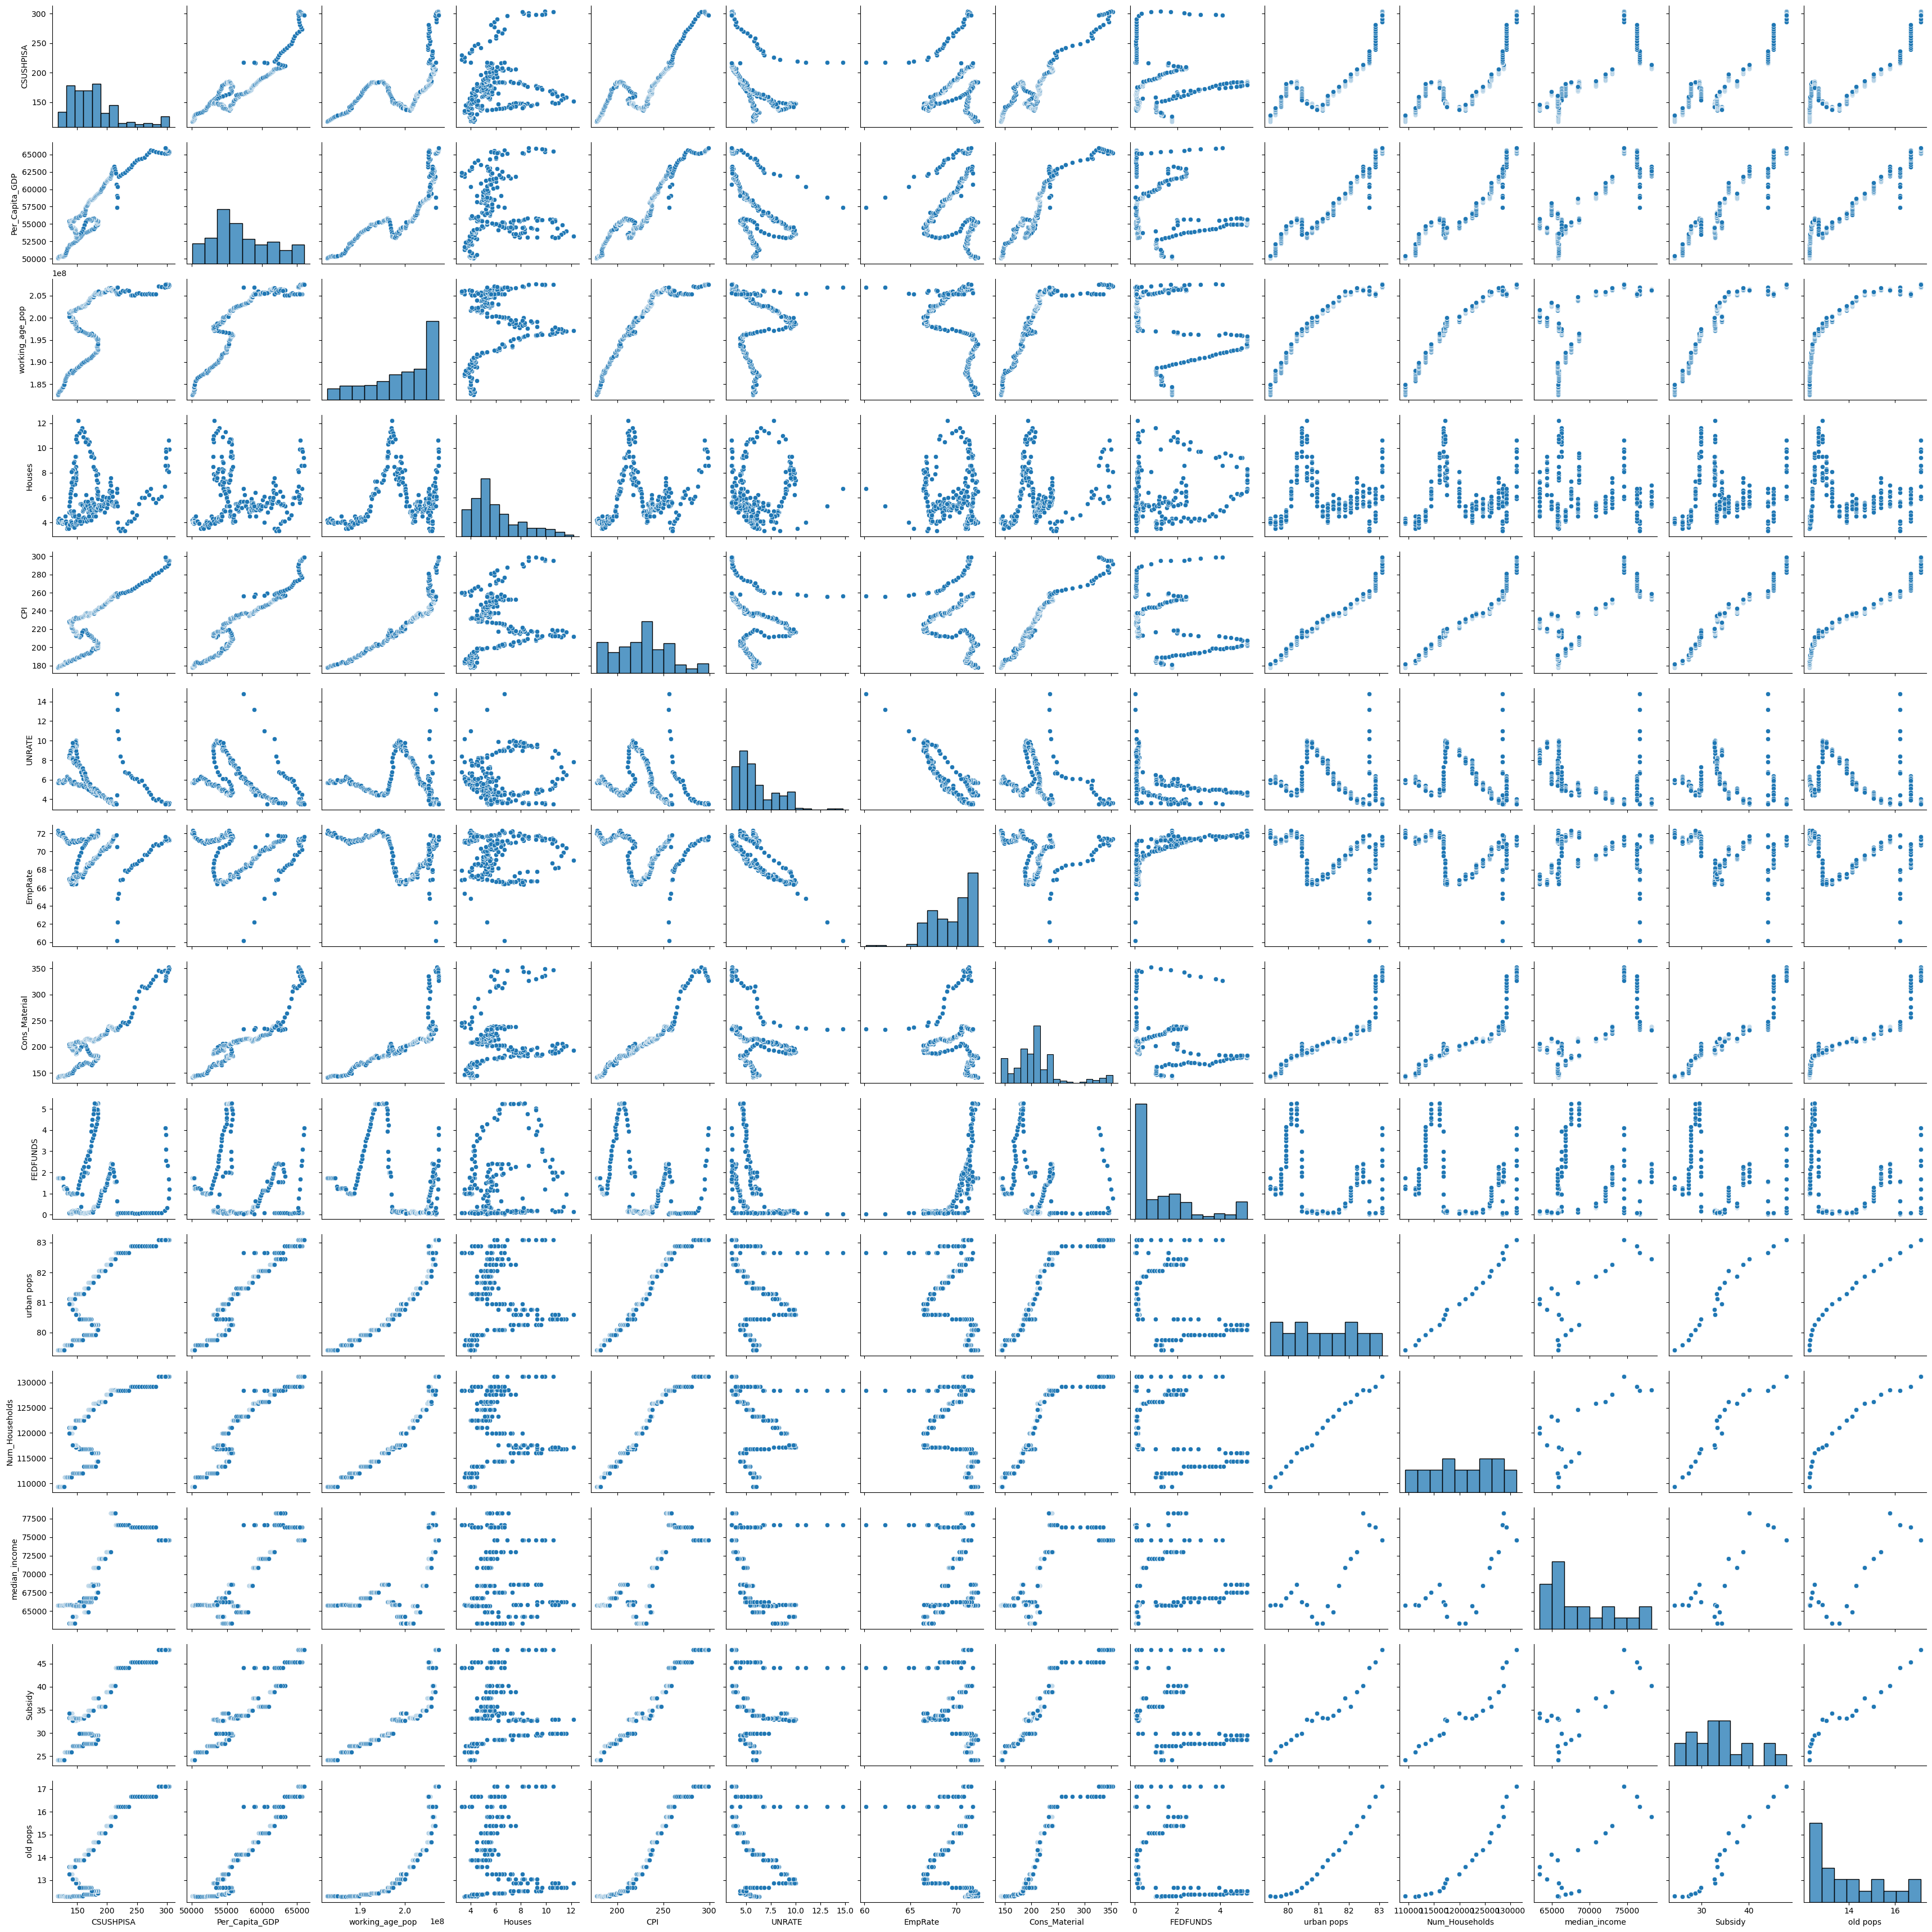

In [9]:
sns.pairplot(us_house_price_df)

In [10]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'urban pops',
       'Num_Households', 'median_income', 'Subsidy', 'old pops'],
      dtype='object')

In [13]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old pops', 'urban pops', 'Subsidy', 'working_age_pop', 'median_income']

**Histograms and Kernel Density Plots**

<Figure size 1300x800 with 0 Axes>

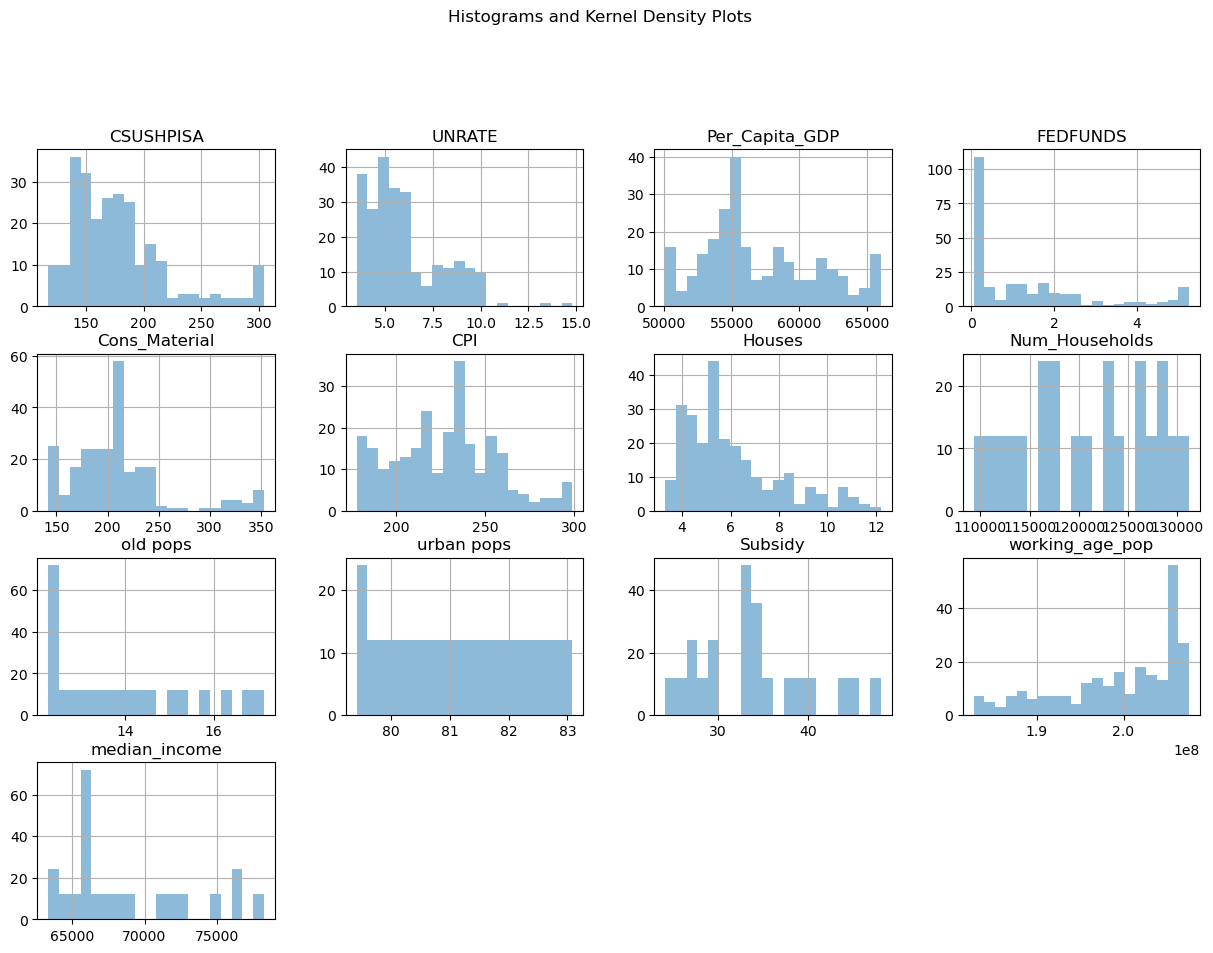

In [14]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

**Violin Plots:**

Generates violin plots to visualize the distribution and density of each factor.

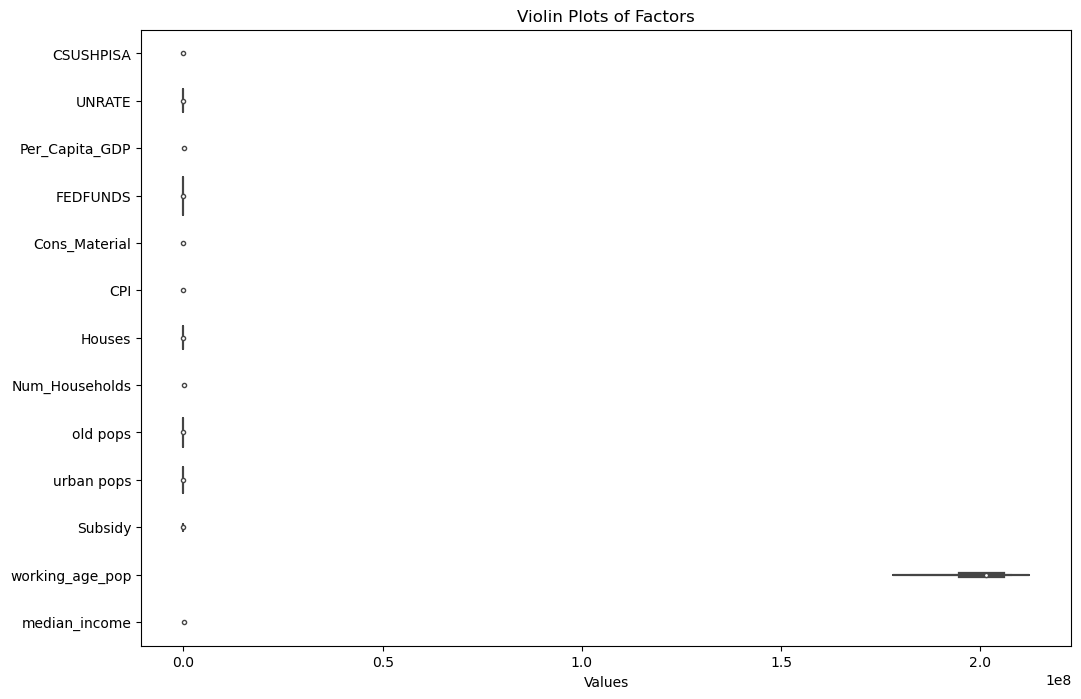

In [15]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

#### Extract features and target

In [16]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

**Plotting scatter plots of the CASE-SHILLER index vs features**

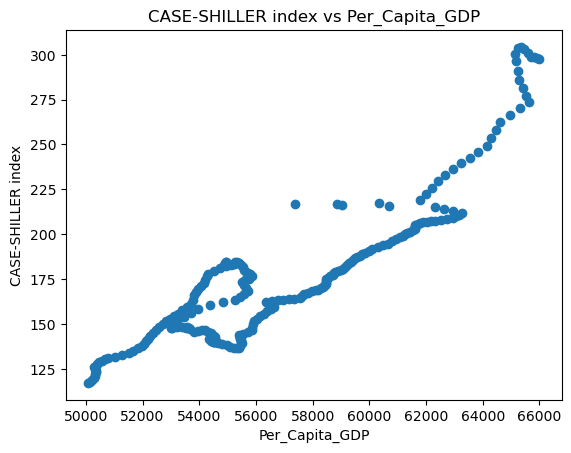

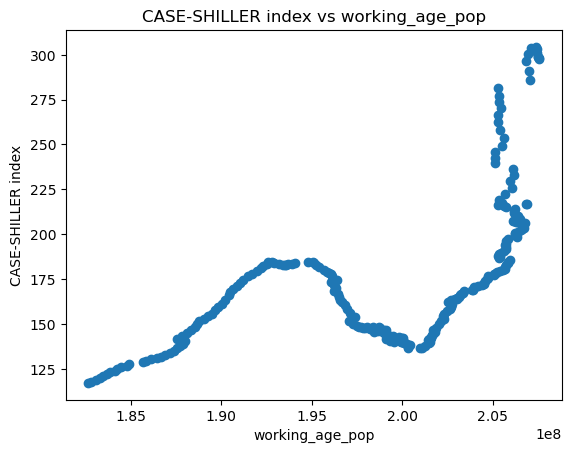

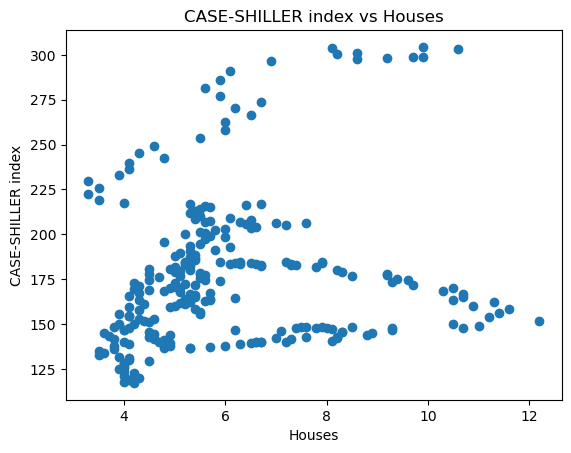

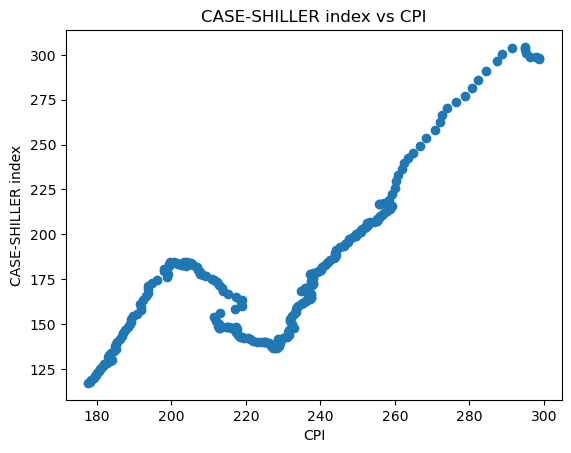

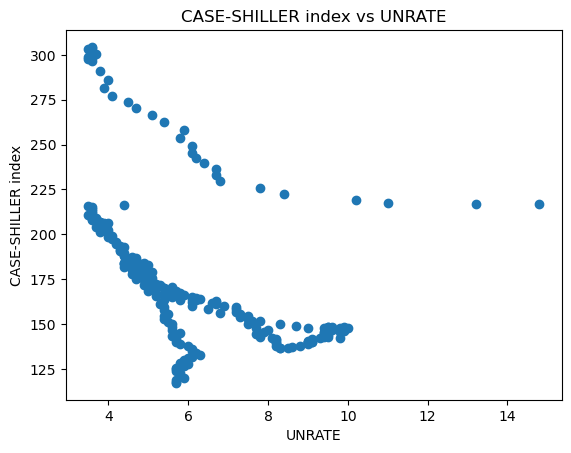

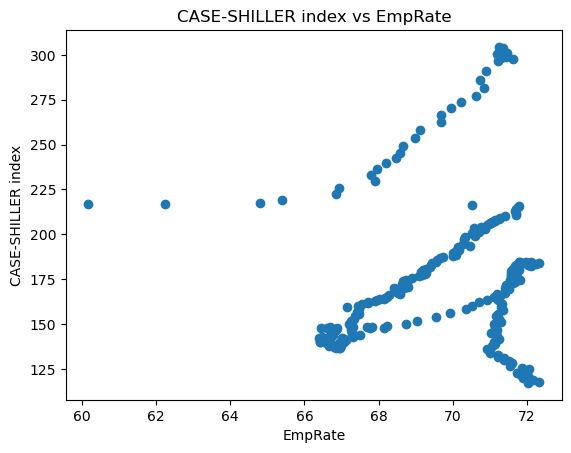

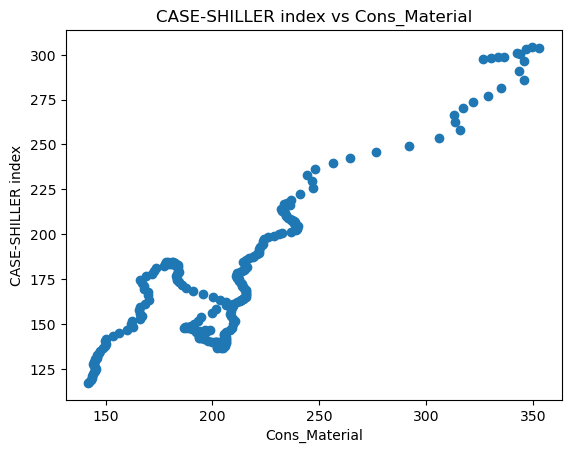

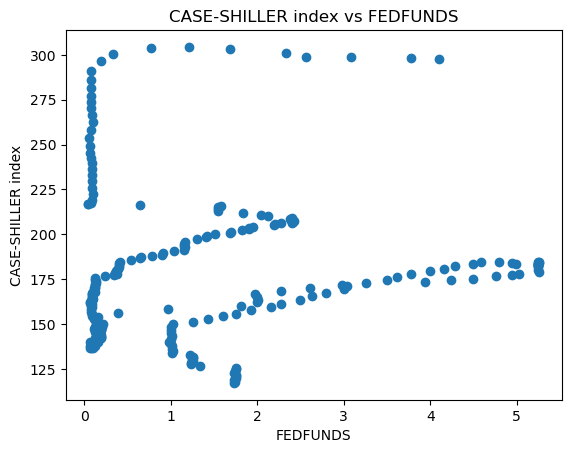

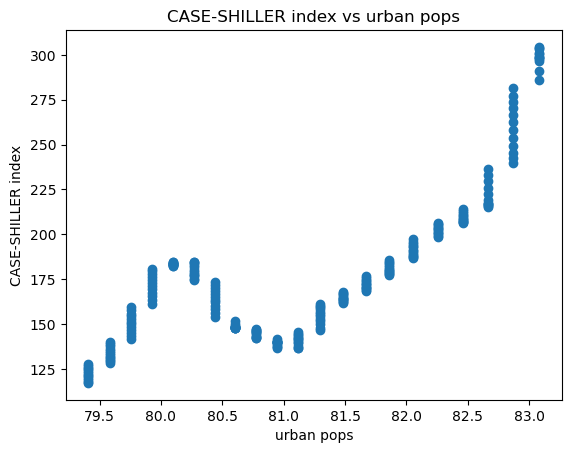

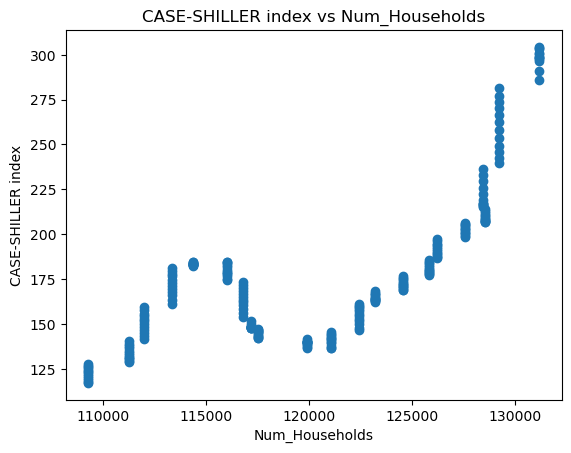

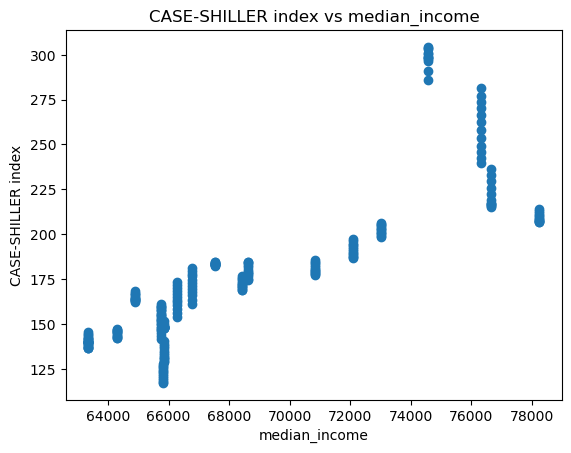

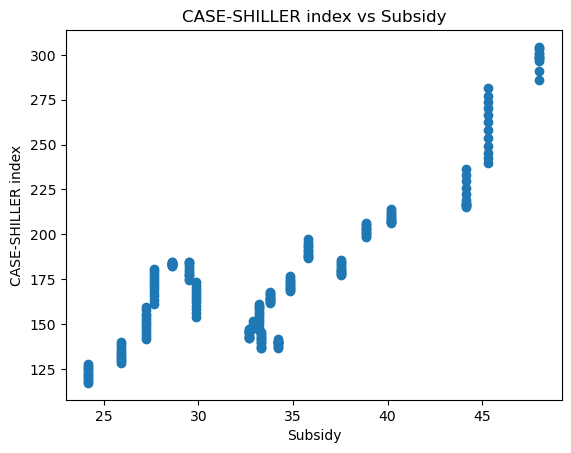

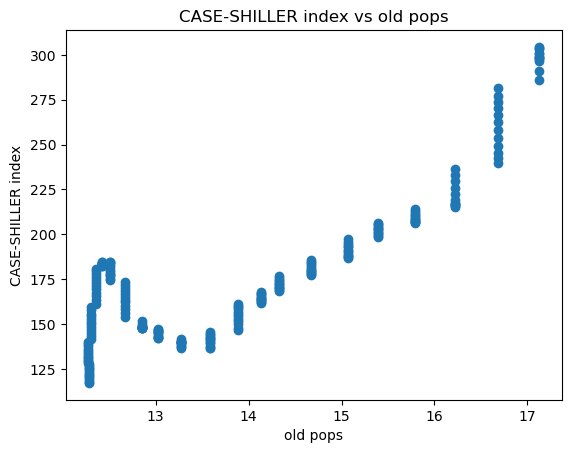

In [17]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [18]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
FEDFUNDS           0.113808
Houses             0.179697
EmpRate            0.199286
UNRATE             0.476949
working_age_pop    0.619784
Num_Households     0.749023
urban pops         0.787225
CPI                0.822255
median_income      0.831605
old pops           0.843768
Subsidy            0.845091
Cons_Material      0.898922
Per_Capita_GDP     0.904410
dtype: float64


Based on the provided correlation coefficients:


**Highest Correlation:**

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904410. This feature shows a strong positive linear relationship with home prices.

**Other Strong Correlations:**

'Cons_Material' (0.898922), 'Subsidy' (0.845091), 'old pops' (0.843768), 'median_income' (0.831605), and 'CPI' (0.822255) also have strong positive correlations.

**Moderate Correlations:**

'urban pops' (0.787225), 'Num_Households' (0.749023), and 'working_age_pop' (0.619784) have moderate positive correlations.


**Lower Correlations:**

'UNRATE' (0.476949), 'EmpRate' (0.199286), 'Houses' (0.179697), and 'FEDFUNDS' (0.113808) have lower correlations.

### Data science models

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

We will drop the columns which has lower correlation with the target.

In [20]:
mult_cols = ["working_age_pop", "Houses", "urban pops", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [21]:
X

,Per_Capita_GDP,CPI,Cons_Material,median_income,Subsidy,old pops
DATE,,,,,,
2002-01-01,50091.000000,177.700,142.000,65820.0,24.183,12.287458
2002-02-01,50156.000000,178.000,142.200,65820.0,24.183,12.287458
2002-03-01,50221.000000,178.500,143.200,65820.0,24.183,12.287458
2002-04-01,50286.000000,179.300,143.500,65820.0,24.183,12.287458
2002-05-01,50311.333333,179.500,143.800,65820.0,24.183,12.287458
...,...,...,...,...,...,...
2022-08-01,65579.000000,295.209,342.753,74580.0,48.021,17.128121
2022-09-01,65689.000000,296.341,336.464,74580.0,48.021,17.128121
2022-10-01,65799.000000,297.863,333.796,74580.0,48.021,17.128121


### Models building

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.


In [24]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 87.37683067423539
R-squared: 0.9290222047170086
Coefficients:
Per_Capita_GDP: 28.499957265679065
CPI: -32.17329517843178
Cons_Material: 45.45884161849002
median_income: 15.179835224368334
Subsidy: 7.086832149123158
old pops: -20.84475544203782
Intercept: 180.00529353233824

Model: ElasticNet
Mean Squared Error: 205.63089674956552
R-squared: 0.8329622672197439
Coefficients:
Per_Capita_GDP: 7.955452680896405
CPI: 2.9927108131974323
Cons_Material: 10.495879867539948
median_income: 8.923945187225746
Subsidy: 4.082559571584003
old pops: 3.0955283239299565
Intercept: 180.0052935323383

Model: Random Forest
Mean Squared Error: 1.7816281872530089
R-squared: 0.9985527508863681
Feature Importance Analysis:
Per_Capita_GDP: 0.06385247473461282
CPI: 0.38517814143810414
Cons_Material: 0.26933264841909926
median_income: 0.15492940341223183
Subsidy: 0.05553694464460759
old pops: 0.0711703873513445

Model: Gradient Boosting
Mean Squared Error: 4.323091829533

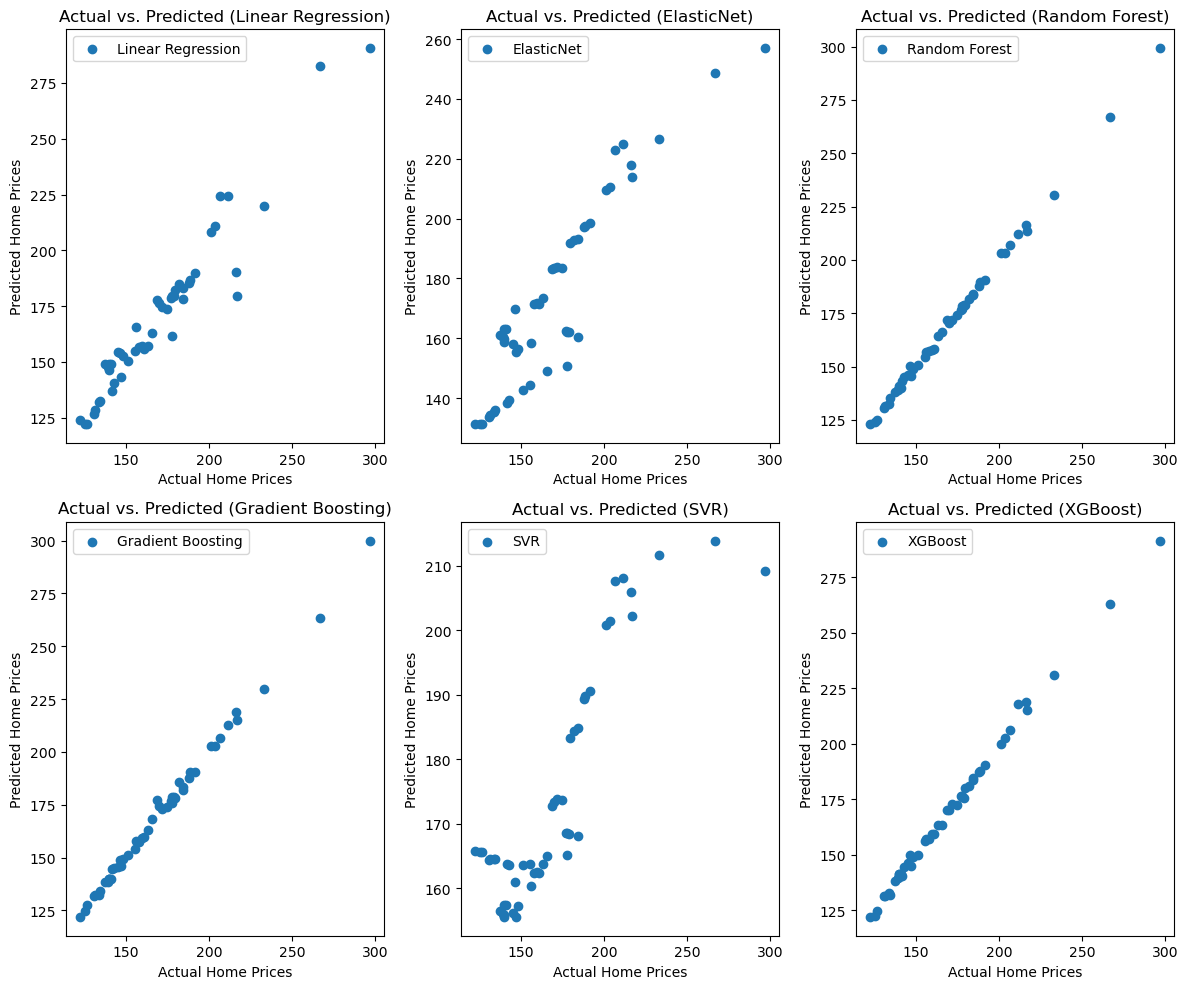


Best Model: RandomForestRegressor with MSE: 1.7816281872530089


In [25]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

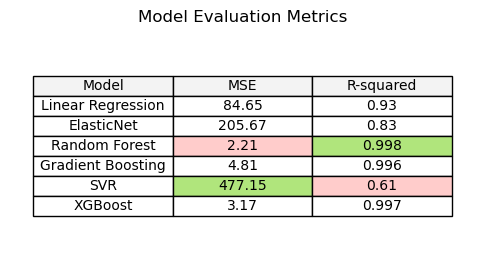

In [26]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()


**Decision:**

**Random Forest and XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

**Gradient Boosting** also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

**Linear Regression and ElasticNet** have higher MSE values, indicating potential limitations in predictive accuracy.

**SVR** has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

**Champion model:** 
In summary, based on the provided metrics, **Random Forest** appear to be a **strong candidate** for the best model, with a low MSE and a high R-squared value.


**Low MSE:** The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.


**High R-squared:** The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.


**Feature Importance:** The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.


